# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

$Цель$ $работы:$ изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и рекурсивных процедур при реализации на ПЭВМ.

Вариант : 5 - Барышев Михаил

Задание 1 : 5 - Реализуйте рекурсивный алгоритм вычисления суммы $n$ первых членов ряда

Задание 2 : Реализуйте алгоритмы из задания 1 не используя рекурсию.

Задание 3 :

- составьте блок-схему;

- оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;

- модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);

- сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).

In [2]:
def SUM(x, n):
    total = 1
    for i in range(1, n + 1):
        total = total + ((x**i)/factorial(i))
    return total

def recursive_sum(x, n):
    if n == 0:
        return 1
    else:
        return (x ** n) / factorial(n) + recursive_sum(x, n-1)

def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result


x = 2
n = 5
s = SUM(x, n)
f = recursive_sum(x, n)
print(round(s, 2))
print(round(f, 2))

7.27
7.27


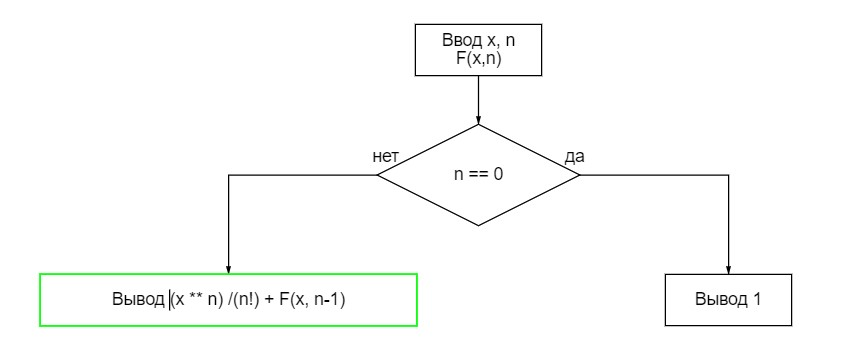

Рекурсивная реализация может привести к переполнению стека вызовов, если глубина рекурсии слишком велика и стек вызовов становится слишком большим. В данном случае, размерность задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов, зависит от доступной памяти и глубины рекурсии.

Для данной задачи, глубина рекурсии определяется параметром n - количество членов ряда, которые необходимо просуммировать. Таким образом, чем больше значение n, тем больше глубина рекурсии и тем больше вероятность переполнения стека вызовов.

Однако, в Python можно увеличить максимальную глубину рекурсии, используя функцию sys.setrecursionlimit(). По умолчанию она установлена на 1000 вызовов, но ее можно изменить на большее значение.

Таким образом, чтобы избежать переполнения стека вызовов, мы можем увеличить максимальную глубину рекурсии или использовать итеративную реализацию функции. Однако, на практике рекурсивный алгоритм может быть менее эффективным, чем итеративный, из-за переключения контекста между вызовами функции и создания множества объектов на стеке вызовов.

In [3]:
# Чтобы сохранять промежуточные результаты вызовов рекурсии, мы можем использовать механизм кэширования, 
# который сохраняет результаты предыдущих вызовов функции и возвращает их при повторном вызове с теми же параметрами. 
# Мы можем реализовать кэширование вручную или с помощью декоратора @memoized.
# Вручную мы можем создать словарь для хранения результатов предыдущих вызовов и проверять его перед рекурсивным вызовом функции:

def recursive_sum_cache(x, n, cache={}):
    if n == 0:
        return 1
    elif n in cache:
        return cache[n]
    else:
        result = (x ** n) / factorial(n) + recursive_sum(x, n-1)
        cache[n] = result
        return result
    
# Здесь мы создаем пустой словарь по умолчанию для хранения результатов и проверяем, есть ли уже результат для данного значения n в словаре. 
# Если есть, то мы возвращаем сохраненное значение из словаря, вместо того чтобы рекурсивно вызывать функцию. 
# Если же результат еще не вычислен, то мы вычисляем его рекурсивно, сохраняем его в словаре и возвращаем его.
# С помощью декоратора @memoized можно автоматически добавить механизм кэширования к функции:

def memoized(func):
    cache = {}
    def wrapper(*args):
        if args in cache:
            return cache[args]
        else:
            result = func(*args)
            cache[args] = result
            return result
    return wrapper

@memoized
def recursive_sum_mem(x, n):
    if n == 0:
        return 1
    else:
        return (x ** n) / factorial(n) + recursive_sum(x, n-1)

# Здесь мы определяем декоратор memoized, который создает словарь для хранения результатов и возвращает функцию-обертку, 
# которая проверяет, есть ли уже результат для данного набора аргументов в словаре. 
# Если результат уже вычислен, то функция-обертка возвращает сохраненное значение, 
# иначе она вызывает исходную функцию и сохраняет ее результат в словаре.
# Теперь при каждом вызове функции recursive_sum с определенными аргументами, 
# ее результат будет сохраняться в словаре, и при повторном вызове с теми же аргументами функция будет возвращать сохраненное значение из кэша. 
# Это позволит избежать повторных вычислений и ускорит выполнение функции при больших значениях n.

In [4]:
cache = {}
result1 = recursive_sum_cache(2, 5, cache)
print(result1)
print(cache)
print(recursive_sum_mem(2, 5))

7.266666666666667
{5: 7.266666666666667}
7.266666666666667


In [6]:
# Сравнение реализаций
import timeit

n = 5
x = 2

# Измеряем время выполнения итеративной функции
iterative_time = timeit.timeit(lambda: SUM(x, n), number=10000)

# Измеряем время выполнения рекурсивной функции без кэширования
recursive_time = timeit.timeit(lambda: recursive_sum(x, n), number=10000)

# Измеряем время выполнения рекурсивной функции с кэшированием
cache = {}
cached_recursive_time = timeit.timeit(lambda: recursive_sum_cache(x, n, cache), number=10000)

print(f"Iterative time: {iterative_time}")
print(f"Recursive time: {recursive_time}")
print(f"Cached recursive time: {cached_recursive_time}")



Iterative time: 0.03523290005978197
Recursive time: 0.038000599946826696
Cached recursive time: 0.0015532000688835979
